# Assignment - 1 (13 June)
#### Created by Akash Bhardwaj

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')

c:\users\akash bhardwaj\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(2)

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases


In [4]:
# Dropping of columns because it has null values only
data.drop(['time_period','time_period_type'],axis=1,inplace=True)

In [5]:
data.head(2)

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases


In [6]:
#Dropping of rows where we have any null values
data.dropna(axis = 0, how ='any',inplace=True)

In [7]:
data.isnull().sum()

report_date        0
location           0
location_type      0
data_field         0
data_field_code    0
value              0
unit               0
dtype: int64

### Q-1) show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration

In [8]:
pd.options.mode.chained_assignment = None
conditional_data = data[(data['data_field_code']=='AR0005')&(data['location']=='Argentina-Catamarca')]
val = conditional_data[['report_date','value']]
val['value']=val['value'].astype(int)
val = val.reset_index(drop=True)
val

,report_date,value
0,2016-03-19,14
1,2016-03-26,15
2,2016-04-02,15
3,2016-04-09,15
4,2016-04-16,15
5,2016-04-29,15
6,2016-05-07,16
7,2016-05-14,15
8,2016-05-22,16
9,2016-05-30,15


#### Month wise values

In [9]:
date = list(val.report_date)
month = []
for d in date:
    yr,mm,dy = d.split('-')
    month.append(mm)
val['month']=month
val_month_wise = val.groupby('month').sum()
val_month_wise = val_month_wise.reset_index()
val_month_wise

,month,value
0,03,29
1,04,60
2,05,62
3,06,61


#### Week wise values

In [10]:
import calendar,datetime
from math import ceil
def month_week(dt):
    first_day = dt.replace(day=1)
    dom = dt.day
    adjusted_dom = dom + first_day.weekday()
    return int(ceil(adjusted_dom/7.0))

date=list(val.report_date)
week_list=[]
for d in date:
    yr,mn,dy=d.split('-')
    date_1=datetime.date(int(yr),int(mn),int(dy))
    week_list.append(str(month_week(date_1)))
val['week']=week_list
val

,report_date,value,month,week
0,2016-03-19,14,03,3
1,2016-03-26,15,03,4
2,2016-04-02,15,04,1
3,2016-04-09,15,04,2
4,2016-04-16,15,04,3
5,2016-04-29,15,04,5
6,2016-05-07,16,05,2
7,2016-05-14,15,05,3
8,2016-05-22,16,05,4
9,2016-05-30,15,05,6


In [11]:
val_week_wise = val.groupby(['month','week']).sum()
val_week_wise = val_week_wise.reset_index()
val_week_wise

,month,week,value
0,03,3,14
1,03,4,15
2,04,1,15
3,04,2,15
4,04,3,15
5,04,5,15
6,05,2,16
7,05,3,15
8,05,4,16
9,05,6,15


### Q-2) Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for entire duration to identify the difference

In [12]:
argcaba = data[(data['unit']=='cases')&(data['location']=='Argentina-CABA')][['report_date','value']]
argcaba.rename(columns={'value':'arg-caba value'},inplace=True)
argcaba.head()

,report_date,arg-caba value
6,2016-03-19,0
7,2016-03-19,0
8,2016-03-19,9
9,2016-03-19,0
10,2016-03-19,68


In [13]:
argcaba['arg-caba value'] = argcaba['arg-caba value'].astype(int)
argcaba['arg-caba value'].dtype

dtype('int32')

In [14]:
argcata = data[(data['unit']=='cases')&(data['location']=='Argentina-Catamarca')][['report_date','value']]
argcata.rename(columns={'value':'arg-catamarca value'},inplace=True)
argcata.head()

,report_date,arg-catamarca value
12,2016-03-19,0
13,2016-03-19,0
14,2016-03-19,0
15,2016-03-19,0
16,2016-03-19,14


In [15]:
argcata['arg-catamarca value'] = argcata['arg-catamarca value'].astype(int)
argcata['arg-catamarca value'].dtype

dtype('int32')

In [16]:
caba=argcaba.groupby('report_date').sum().reset_index()

In [17]:
catamarca=argcata.groupby('report_date').sum().reset_index()

In [18]:
# Dataframe for Month wise duration
graph=pd.merge(catamarca,caba,on=['report_date'])
graph['difference'] = graph['arg-caba value'] - graph['arg-catamarca value']
graph
date = list(graph.report_date)
month = []
for d in date:
    yr,mm,dy = d.split('-')
    month.append(mm)
graph['month']=month
graph1 = graph.groupby('month').sum()
graph1 = graph1.reset_index()
graph1

,month,arg-catamarca value,arg-caba value,difference
0,03,29,170,141
1,04,60,390,330
2,05,62,773,711
3,06,61,566,505


Text(0, 0.5, 'Values')

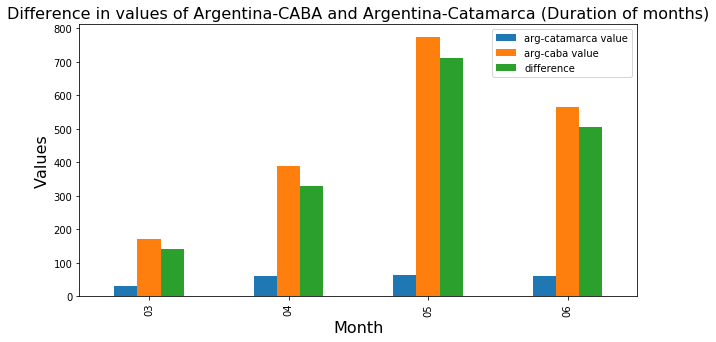

In [19]:
# Graph plotting (month-wise duration)
graph1.plot(x='month',kind='bar',figsize=(10,5))
plt.title('Difference in values of Argentina-CABA and Argentina-Catamarca (Duration of months)',fontsize=16)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Values',fontsize=16)

In [20]:
# Dataframe for Week-wise duration
def month_week(dt):
    first_day = dt.replace(day=1)
    dom = dt.day
    adjusted_dom = dom + first_day.weekday()
    return int(ceil(adjusted_dom/7.0))

date=list(graph.report_date)
week_list=[]
for d in date:
    yr,mn,dy=d.split('-')
    date_1=datetime.date(int(yr),int(mn),int(dy))
    week_list.append(str(month_week(date_1)))
graph['week']=week_list

graph2 = graph.groupby(['month','week']).sum()
graph2 = graph2.reset_index()
graph2

,month,week,arg-catamarca value,arg-caba value,difference
0,03,3,14,78,64
1,03,4,15,92,77
2,04,1,15,94,79
3,04,2,15,97,82
4,04,3,15,98,83
5,04,5,15,101,86
6,05,2,16,255,239
7,05,3,15,126,111
8,05,4,16,260,244
9,05,6,15,132,117


In [21]:
month=list(graph2.month)
week=list(graph2.week)
month_and_week=[]
for i in range(0,len(month)):
    name=calendar.month_name[int(month[i])]
    month_and_week.append(name+' week '+week[i])
month_and_week
graph2['month_and_week']=month_and_week
graph2

,month,week,arg-catamarca value,arg-caba value,difference,month_and_week
0,03,3,14,78,64,March week 3
1,03,4,15,92,77,March week 4
2,04,1,15,94,79,April week 1
3,04,2,15,97,82,April week 2
4,04,3,15,98,83,April week 3
5,04,5,15,101,86,April week 5
6,05,2,16,255,239,May week 2
7,05,3,15,126,111,May week 3
8,05,4,16,260,244,May week 4
9,05,6,15,132,117,May week 6


Text(0, 0.5, 'Values')

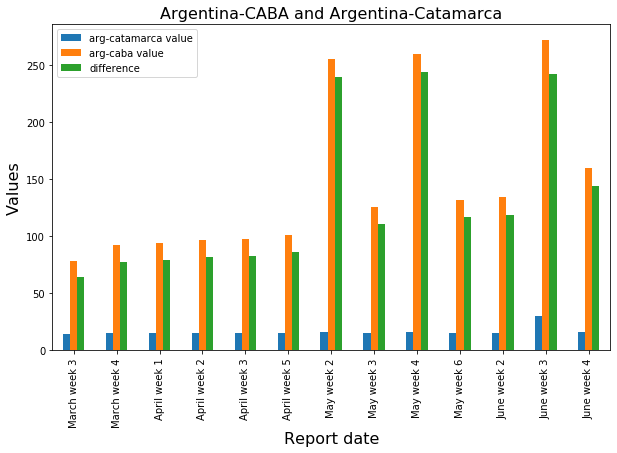

In [22]:
# Graph plotting (week-wise duration)
graph2.plot(x='month_and_week',kind='bar',figsize=(10,6))
plt.title('Argentina-CABA and Argentina-Catamarca',fontsize=16)
plt.xlabel('Report date',fontsize=16)
plt.ylabel('Values',fontsize=16)

 ### Q-3) Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca'

In [23]:
# Dataframe for 'Argentina-Buenos_Aires'

arg_Bue_aires = data[(data['location']=='Argentina-Buenos_Aires')][['data_field','value']]
arg_Bue_aires['value'] = arg_Bue_aires['value'].astype(int)
arg_Bue_aires_g1 = arg_Bue_aires.groupby('data_field').sum().reset_index()
arg_Bue_aires_g1

,data_field,value
0,cumulative_cases_discarded,251
1,cumulative_cases_under_study,2981
2,cumulative_confirmed_imported_cases,32
3,cumulative_confirmed_local_cases,0
4,cumulative_probable_imported_cases,15
5,cumulative_probable_local_cases,0


In [24]:
# Dataframe for 'Argentina_CABA'

arg_caba = data[(data['location']=='Argentina-CABA')][['data_field','value']]
arg_caba['value']=arg_caba['value'].astype(int)
arg_caba_g2 = arg_caba.groupby('data_field').sum().reset_index()
arg_caba_g2

,data_field,value
0,cumulative_cases_discarded,27
1,cumulative_cases_under_study,1748
2,cumulative_confirmed_imported_cases,124
3,cumulative_confirmed_local_cases,0
4,cumulative_probable_imported_cases,0
5,cumulative_probable_local_cases,0


In [25]:
# Dataframe for 'Argentina-Catamarca'

arg_catamarca = data[(data['location']=='Argentina-Catamarca')][['data_field','value']]
arg_catamarca['value']=arg_catamarca['value'].astype(int)
arg_catamarca_g3 = arg_catamarca.groupby('data_field').sum().reset_index()
arg_catamarca_g3

,data_field,value
0,cumulative_cases_discarded,0
1,cumulative_cases_under_study,212
2,cumulative_confirmed_imported_cases,0
3,cumulative_confirmed_local_cases,0
4,cumulative_probable_imported_cases,0
5,cumulative_probable_local_cases,0


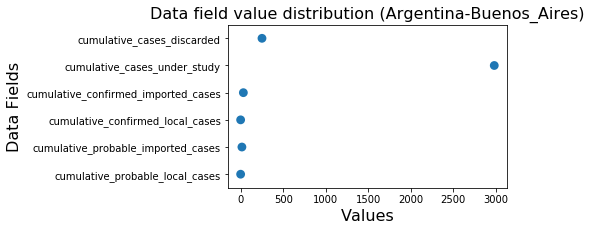

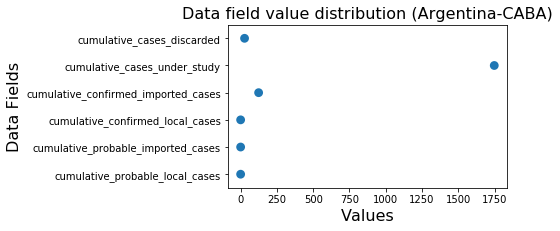

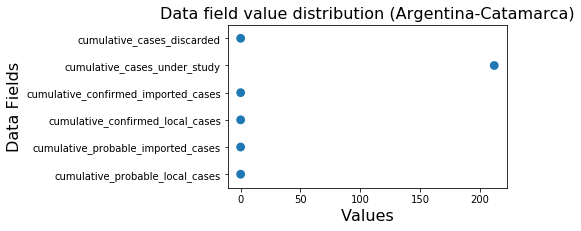

In [26]:
# Graph plotting for 'Argentina-Buenos_Aires' 
plt.subplots(figsize=(5,3))
sb.pointplot(x='value',y='data_field',data = arg_Bue_aires_g1,join=False)
plt.xlabel('Values',fontsize=16)
plt.ylabel('Data Fields',fontsize=16)
plt.title('Data field value distribution (Argentina-Buenos_Aires)',fontsize=16)
plt.show()

# Graph plotting for 'Argentina-CABA'
plt.subplots(figsize=(5,3))
sb.pointplot(x='value',y='data_field',data = arg_caba_g2,join=False)
plt.xlabel('Values',fontsize=16)
plt.ylabel('Data Fields',fontsize=16)
plt.title('Data field value distribution (Argentina-CABA)',fontsize=16)
plt.show()

# Graph plotting for 'Argentina-Catamarca'
plt.subplots(figsize=(5,3))
sb.pointplot(x='value',y='data_field',data = arg_catamarca_g3,join=False)
plt.xlabel('Values',fontsize=16)
plt.ylabel('Data Fields',fontsize=16)
plt.title('Data field value distribution (Argentina-Catamarca)',fontsize=16)
plt.show()

In [27]:
# Dataframe for all locations ('Argentina-Buenos_Aires','Argentina-CABA','Argentina-Catamarca')
aires_caba_catamarca = data[(data['location']=='Argentina-Buenos_Aires') | (data['location']=='Argentina-CABA') | (data['location']=='Argentina-Catamarca')][['location','value']]
aires_caba_catamarca['value']=aires_caba_catamarca['value'].astype(int)
aires_caba_catamarca_g4 = aires_caba_catamarca.groupby('location').sum().reset_index()
aires_caba_catamarca_g4

,location,value
0,Argentina-Buenos_Aires,3279
1,Argentina-CABA,1899
2,Argentina-Catamarca,212


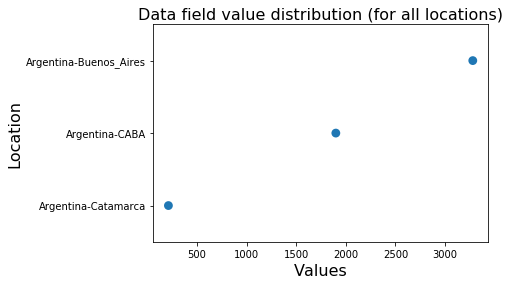

In [28]:
# Graph plotting for all locations
sb.pointplot(x='value',y='location',data = aires_caba_catamarca_g4, join=False)
plt.xlabel('Values',fontsize=16)
plt.ylabel('Location',fontsize=16)
plt.title('Data field value distribution (for all locations)',fontsize=16)
plt.show()

### Q-4) Build a program to predict the correct word for wrongly typed word. for example whst => what, numbr =>number, good => good

In [29]:
import string
import difflib

In [30]:
# To remove the punctuation marks and extra space from big.txt file
big = 'big.txt'
file = open(big, 'rt')
text = file.read()
file.close()
words = text.split()
table = str.maketrans('', '', string.punctuation)
cleaned_file = [w.translate(table) for w in words]

In [31]:
def predict_word(user_input):
    close_match = difflib.get_close_matches(user_input,cleaned_file)  
    if len(close_match)==0:
        return f'No word like "{user_input}" is in the dictionary'
    elif user_input == close_match[0]:
        return f'Your word "{user_input}" is correct'
    else:
        r = np.random.randint(2, size=1)
        return f'Did you mean "{close_match[r[0]]}"?'
if __name__=="__main__":
    user_input = input("Enter your word: ")
    if user_input.isdigit() or user_input == "" or not user_input.isalpha():
        print('It is not a word')
    else:
        result = predict_word(user_input)
        print(result)

Enter your word: suces
Did you mean "success"?
